# Coding Exercises (Part 12)

## Financial Data: Essential Workflows

### Exercise 12: Financial Time Series

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

Import the us stocks dataset (__us_stocks.csv__) and select the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.). Save the DataFrame in the variable __stocks__ and work through the next questions with this DataFrame!

In [1]:
import pandas as pd

In [15]:
us_stocks=pd.read_csv("us_stocks.csv",header=[0,1],index_col=0,parse_dates=True)
us_stocks.head()

Open                                                  \
                  AXP  FB       INTC        MCD         PG        WMT   
Date                                                                    
2009-12-31  40.900002 NaN  20.600000  62.970001  61.520000  54.250000   
2010-01-04  40.810001 NaN  20.790001  62.630001  61.110001  53.740002   
2010-01-05  40.830002 NaN  20.940001  62.660000  61.130001  54.090000   
2010-01-06  41.230000 NaN  20.809999  62.200001  60.939999  53.500000   
2010-01-07  41.259998 NaN  20.730000  61.250000  60.580002  53.720001   

                 High                        ...  Adj Close             \
                  AXP  FB       INTC    MCD  ...       INTC        MCD   
Date                                         ...                         
2009-12-31  41.080002 NaN  20.719999  63.07  ...  15.252899  47.055138   
2010-01-04  41.099998 NaN  21.030001  63.07  ...  15.611791  47.311375   
2010-01-05  41.230000 NaN  20.990000  62.75  ...  15.604316  46.949627   
2010-01-06  41.669998 NaN  20.930000  62.41  ...  15.551979  46.309067   
2010-01-07  42.240002 NaN  20.760000  62.34  ...  15.402434  46.648193   

                                    Volume                                   \
                   PG        WMT       AXP  FB      INTC       MCD       PG   
Date                                                                          
2009-12-31  45.146072  42.548668   4030500 NaN  26429200   4495300  5942200   
2010-01-04  45.510941  43.169579   6894300 NaN  47800900   5839300  9190800   
2010-01-05  45.525822  42.739723  10641200 NaN  52357700   7099000  8649400   
2010-01-06  45.309883  42.644184   8399400 NaN  40037400  10551300  9908400   
2010-01-07  45.064171  42.668079   8981700 NaN  54041500   7517700  8972800   

                      
                 WMT  
Date                  
2009-12-31   9764800  
2010-01-04  20753100  
2010-01-05  15648400  
2010-01-06  12517200  
2010-01-07  10662700  

[5 rows x 36 columns]

In [24]:
stocks=us_stocks["Adj Close"]["31-12-2015":"31-12-2018"]
# dataframe[slice] to filter the index
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-04,64.052849,102.220001,31.017828,108.452126,70.514938,56.870766
2016-01-05,63.067310,102.730003,30.871820,109.946350,70.739891,58.221748
2016-01-06,61.315948,102.970001,30.187403,109.208458,70.056053,58.804699
2016-01-07,60.763893,97.919998,29.055828,106.681190,69.444221,60.174198


- __Visualize__ the Adjusted Close of the six stocks __over time__!

In [26]:
import matplotlib.pyplot as plt

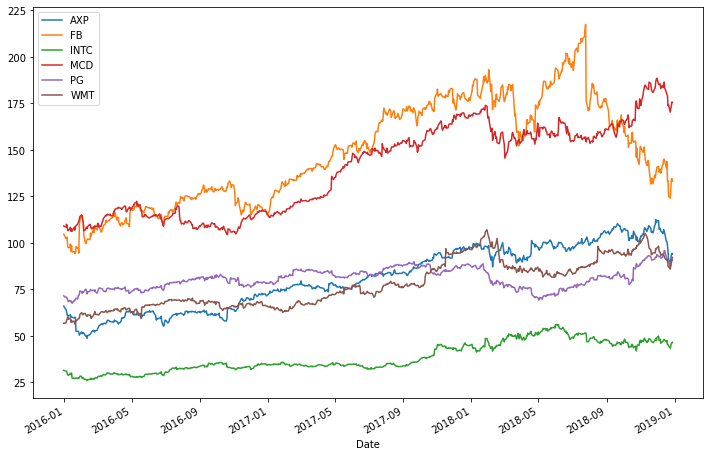

In [168]:
stocks.plot(figsize=(12,8))
plt.show()

- __Visualize__ the __normalized__ Adjusted Close of the six stocks __over time__, each starting at a __Base Value of 100__!

In [35]:
norm_stocks = stocks/stocks.iloc[0]*100

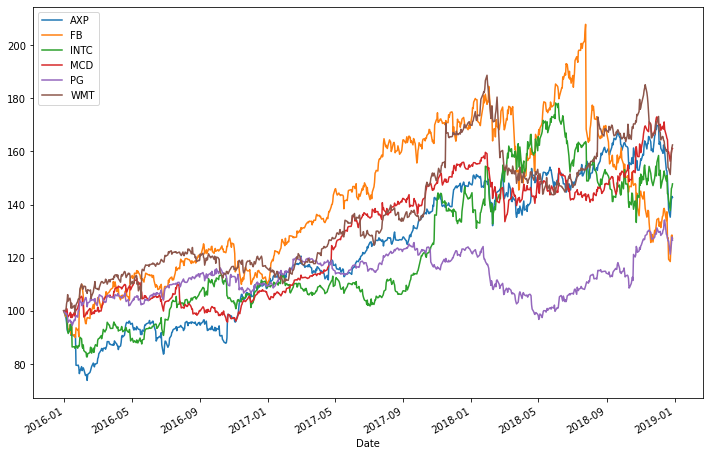

In [169]:
norm_stocks.plot(figsize=(12,8))
plt.show()

- Calculate __monthly returns__ for all six stocks and create a new __returns__ DataFrame!

In [37]:
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-04,64.052849,102.220001,31.017828,108.452126,70.514938,56.870766
2016-01-05,63.067310,102.730003,30.871820,109.946350,70.739891,58.221748
2016-01-06,61.315948,102.970001,30.187403,109.208458,70.056053,58.804699
2016-01-07,60.763893,97.919998,29.055828,106.681190,69.444221,60.174198


In [155]:
# idea to generate monthly return from daily price:
# step1: resample the time series by month and last
# step2: pct_change() to get change in percentage
end_p=stocks.resample("M",kind="period").last()
returns=end_p.pct_change().dropna()
returns.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2016-01,-0.227403,0.072138,-0.099564,0.047740,0.037677,0.082545
2016-02,0.038879,-0.047144,-0.037703,-0.046067,-0.017138,-0.000302
2016-03,0.104714,0.067153,0.093275,0.072446,0.025159,0.040051
2016-04,0.070794,0.030500,-0.063988,0.006445,-0.018639,-0.023653
2016-05,0.005044,0.010461,0.052274,-0.035022,0.011483,0.066221


In [156]:
# get summary by aggregate
summary=returns.aggregate(["mean","std"])
summary

,AXP,FB,INTC,MCD,PG,WMT
mean,0.012162,0.008656,0.012559,0.014179,0.007358,0.014997
std,0.065456,0.063183,0.058963,0.041817,0.039945,0.054054


- Calculate the __annualized mean return__ and the __annualized standard deviation__ of returns for all six stocks!

In [157]:
summary.iloc[0]=summary.iloc[0]*12
summary.iloc[1]=summary.iloc[1]*(12**0.5)
summary=summary.T
summary

,mean,std
AXP,0.145942,0.226748
FB,0.103868,0.218871
INTC,0.150712,0.204255
MCD,0.170144,0.144859
PG,0.088297,0.138374
WMT,0.179962,0.187247


- __Visualize risk/return__ of all six stocks in a (total) risk / return framework. (annualized std on the x-axis, annualized mean returns on the y-axis). <br>
Identify the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__)

['AXP', 'FB', 'INTC', 'MCD', 'PG', 'WMT']


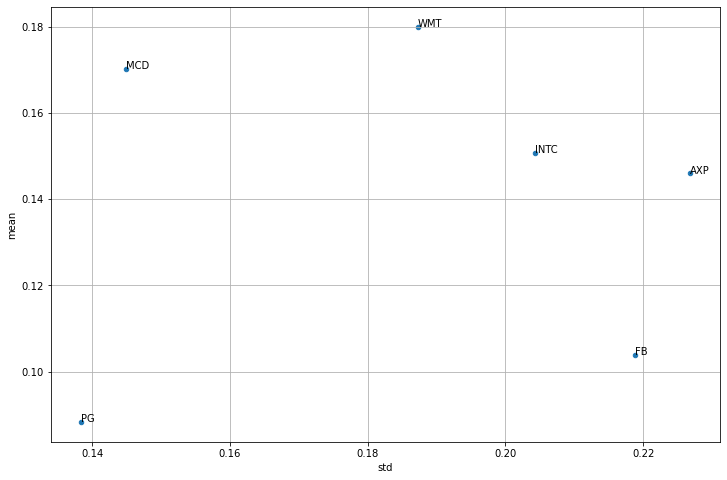

In [170]:
# plt.scatter(summary.iloc[1],summary.iloc[0])
summary.plot(x="std",y="mean",kind="scatter",figsize=(12,8),grid=True)
txt=list(summary.index)
print(txt)
for i in range(0,len(txt)):
#     plt.annotate(text,xy,xytext) to add comments to scatters
    plt.annotate(txt[i],(summary.iloc[i,1],summary.iloc[i,0]),(summary.iloc[i,1],summary.iloc[i,0]))   
plt.show()

- __Visualize__ the __correlation matrix__ of monthly returns with a __Seaborn Heatmap__. Which stocks-pair shows the __highest (positive) correlation__ of monthly returns?

In [124]:
returns.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2016-01,-0.227403,0.072138,-0.099564,0.047740,0.037677,0.082545
2016-02,0.038879,-0.047144,-0.037703,-0.046067,-0.017138,-0.000302
2016-03,0.104714,0.067153,0.093275,0.072446,0.025159,0.040051
2016-04,0.070794,0.030500,-0.063988,0.006445,-0.018639,-0.023653
2016-05,0.005044,0.010461,0.052274,-0.035022,0.011483,0.066221


In [125]:
import seaborn as sns

In [130]:
corr_matrix = returns.corr()
corr_matrix

,AXP,FB,INTC,MCD,PG,WMT
AXP,1.000000,0.068655,0.306292,0.261880,-0.099335,-0.048483
FB,0.068655,1.000000,0.169326,0.069091,-0.008261,0.149272
INTC,0.306292,0.169326,1.000000,0.084089,-0.074533,0.129686
MCD,0.261880,0.069091,0.084089,1.000000,0.177252,0.505501
PG,-0.099335,-0.008261,-0.074533,0.177252,1.000000,0.359595
WMT,-0.048483,0.149272,0.129686,0.505501,0.359595,1.000000


<AxesSubplot:>

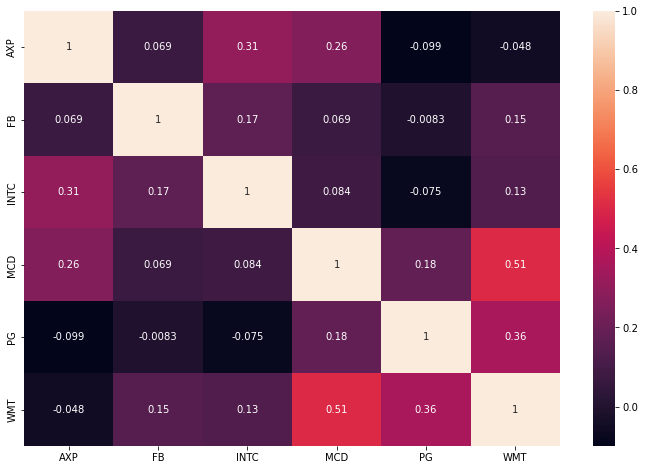

In [174]:
plt.figure(figsize=(12,8))
# to get heatmap we need correlation matrix as input of seaborn.heatmap()
# also when annot is True, corr will apprear on each square
sns.heatmap(corr_matrix,annot=True)

------------------------

# Well Done!

-------------------

# Hints (Spoiler!)

105. The first two rows (index pos. 0 & 1) form the MultiIndex. The Column with Datetime information is at index pos. 0.

106. stocks = stocks.loc[---:---, ---]

107. plot() method


108. div() method, plot() method

109. resample() method, last() method, use "M"

110. pct_change() method, dropna() method

111. agg() method, "mean" and "std"

112. *12 and *np.sqrt(12)

113. scatterplot, std and mean

114. corr() method

115. heatmap, ret.corr()